# Shopify Data Science Intern Technical Challenge 
### By: Tahir Muhammad

# Question 1. Analyzing the Sneakers Data - What is wrong with the AOV?

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.  <br>
b) What metric would you report for this dataset? <br>
c) What is its value?


## Solution - a)

Average Order Value, or AOV is defined as how many the average dollar amount spent each time a customer places an order on a website or mobile app.

$$ AOV = \dfrac{\textrm{Revenue}}{\textrm{Number of Orders}} $$

Since we have 100 stores, we would need to add up the sneaker revenue from every store, and then divide it by the total number of orders we got. <br>
#### Potential Mistakes: 
- Numerical Error (We forgot to divide by the correct number of orders, or all of the order items wasn't summed up properly)<br> 
- Outliers in our data. We could have some users who placed bulk orders, or paid alot more money than an average sneaker sale for limited edition sneakers, proceeding to skew the average drastically.  

#### Potential Fixes: 
- Taking care of the outliers
- Using other metrics such as average item value, number of items sold per order, purchases per customer, or retail conversion rate.


In [1]:
# import relevent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Remove some default limiters to have more control over what we see 
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', 400)

In [2]:
# read in the data into a pandas dataframe 
sneaker_shops_df = pd.read_excel(r"2019 Winter Data Science Intern Challenge Data Set.xlsx")

In [3]:
sneaker_shops_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [4]:
# Get the AOV -- there was a total of 5000 orders. 
sneaker_shops_df["order_amount"].sum() / 5000

3145.128

<AxesSubplot:>

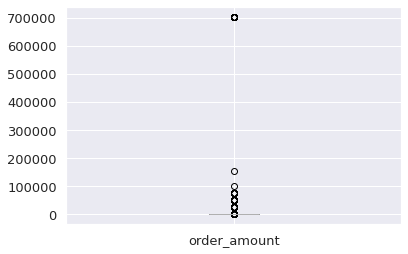

In [5]:
sneaker_shops_df.boxplot(column=["order_amount"], grid=True, fontsize = 13)

Wow! quite a few outliers,and 1 extremely big order amount value of 70,000 which is definetly skewing the average. 

## Solution - b and c) Using another metric

Looking at the mentioned metrics above, note that retail conversion rate may not be the best metric because we want a bigger picture. Looking at the conversion rate for all 100 stores may not be as meaningful as looking at the conversion rate of a specific store. 

Thus, we propose the following metric AIV, to replace the AOV: 

$$ \textrm{AIV} = \dfrac{ \textrm{Total Revenue}}{\textrm{Total Number of Items Sold}} $$

By using this metric, we are now able to take into account the bulk orders which were evident in our data of 2000 items per order, etc.

#### Important Note

Note that to calculate AIV properly, we need to be mindful that some stores are selling more, some are selling less which should accurately represent their contribution in the overall AIV calculation.<br>

Thus, in general, $$\dfrac{sum(x)}{sum(y)} \neq \dfrac{sum(\dfrac{x}{y})}{N} $$ <br> where x is the order_items column, y is the total_items column and N is the total number of stores. Since the mentioned equations are not equal, we go the "longer" but more accurate route, on the RHS. We first calculate the AIV for each store, and then divide sum them up and divide by the total number of stores to get a hollistic picture of all stores. <br>

In [7]:
# How many orders are the shops getting on average?
orders_per_shop = sneaker_shops_df.groupby("shop_id").sum()
orders_per_shop.head()

,order_id,user_id,order_amount,total_items
shop_id,,,,
1,110641,36679,13588,86
2,126448,47370,9588,102
3,110682,40690,14652,99
4,140128,44189,13184,103
5,112423,38800,13064,92


In [8]:
# Create a new variable as AIV for each shop
orders_per_shop["AIV"] = orders_per_shop["order_amount"] / orders_per_shop["total_items"]

In [10]:
orders_per_shop.head(100)

,order_id,user_id,order_amount,total_items,AIV
shop_id,,,,,
1,110641,36679,13588,86,158.0
2,126448,47370,9588,102,94.0
3,110682,40690,14652,99,148.0
4,140128,44189,13184,103,128.0
5,112423,38800,13064,92,142.0
6,143483,49818,22627,121,187.0
7,145326,47441,12208,109,112.0
8,138598,39932,11088,84,132.0
9,160256,49951,13806,117,118.0


We can see that most of our AIVs are with-in the $100 - $200 range, which makes sense. <br>
Also note that there is a massive outlier ($25725.0) which will highly skew our results. 

In [15]:
# Lets sum up all of the AOVs and divide by the total number of shops (100) -- Outliers included. 
total_AIV = orders_per_shop["AIV"].sum() / len(orders_per_shop)
total_AIV

407.99

In [16]:
# Without the massive outlier
total_AIV = (orders_per_shop["AIV"].sum() - 25725 ) / (len(orders_per_shop) - 1) 
total_AIV

152.26262626262627

### Thus, we can see that the true AIV is approximately $152.26, which does make alot more sense. 

Therefore, on average, we can expect a sneaker price to be around $150 from within these 99 stores. 

# Question 2. Queries for the database